# Pacotes


In [116]:
import pandas as pd
import numpy as np
import os
import seaborn as sn
from itertools import permutations, product
import matplotlib.pyplot as mplt
import scipy.stats as stats
import scipy.stats as ss
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Origem dos Dados

In [117]:
# setar diretório dos cadernos
diretorio = r'C:\Users\JoãoPinheiro\OneDrive - CTI Global\Área de Trabalho\dados_ibge'
diretorio = diretorio.replace('\\', '/')

os.chdir(diretorio)
os.getcwd()

'C:\\Users\\JoãoPinheiro\\OneDrive - CTI Global\\Área de Trabalho\\dados_ibge'

# Cadernos IBGE
Os cadernos importados utilizados são: DOMICILIO, CONDICOES_VIDA, MORADOR_QUALI_VIDA, MORADOR.
2017 - 2018
Fonte: https://www.ibge.gov.br/estatisticas/sociais/saude/24786-pesquisa-de-orcamentos-familiares-2.html

In [118]:
# ---------------- Download Cadernos ---------------- #
#### DOMICILIO
# largura do txt
larguras = [2,4,1,9,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,14,1]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "V0201", "V0202",
            "V0203", "V0204", "V0205", "V0206", "V0207",
            "V0208", "V0209", "V02101", "V02102",
            "V02103", "V02104", "V02105", "V02111",
            "V02112", "V02113", "V0212", "V0213",
            "V02141", "V02142", "V0215", "V02161",
            "V02162", "V02163", "V02164", "V0217",
            "V0219", "V0220", "V0221", "PESO",
            "PESO_FINAL", "V6199"]

# leitura dos dados
DOMICILIO = pd.read_fwf(
    os.path.join(diretorio, "DOMICILIO.txt"), 
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

##### CONDICOES_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,1,6,5,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,14,14,10]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V6101", "V6102", "V6103", "V61041", "V61042",
            "V61043", "V61044", "V61045", "V61046",
            "V61051", "V61052", "V61053", "V61054",
            "V61055", "V61056", "V61057", "V61058",
            "V61061", "V61062", "V61063", "V61064",
            "V61065", "V61066", "V61067", "V61068",
            "V61069", "V610610", "V610611", "V61071",
            "V61072", "V61073", "V6108", "V6109",
            "V6110", "V6111", "V6112", "V6113", "V6114",
            "V6115", "V6116", "V6117", "V6118", "V6119",
            "V6120", "V6121", "PESO", "PESO_FINAL",
            "RENDA_TOTAL"]

# leitura dos dados
CONDICOES_VIDA = pd.read_fwf(
    os.path.join(diretorio, "CONDICOES_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


##### MORADOR_QUALI_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,20,20,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,2,20,20,14,14]

# nome das colunas
colunas = ["UF","ESTRATO_POF","TIPO_SITUACAO_REG","COD_UPA",
            "NUM_DOM","NUM_UC","COD_INFORMANTE","CONTAGEM_PONDERADA",
            "FUNCAO_PERDA","V201","V202","V204","V205","V206",
            "V207","V208","V209","V210","V211","V212","V214","V215",
            "V216","V217","V301","V302","V303","V304","V305","V306",
            "V307","V308","V401","V402","V403","V501","V502","V503",
            "V504","V505","V506","V601","V602","V603","V604","V605",
            "V606","V607","V608","V609","V610","V611","V701","V702",
            "V703","V704","V801","V802","V901","V902","GRANDE_REGIAO",
            "C1","C2","C3","C4","C5","C6","C7","RENDA_DISP_PC",
            "RENDA_DISP_PC_SS","PESO","PESO_FINAL"]

# leitura dos dados
MORADOR_QUALI_VIDA = pd.read_fwf(
    os.path.join(diretorio, "MORADOR_QUALI_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


#### MORADOR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,1,2,2,4,3,1,1,
            1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,
            2,1,2,14,14,10,1,20,20,20,20]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V0306", "V0401", "V04021", "V04022", "V04023",
            "V0403", "V0404", "V0405", "V0406", "V0407",
            "V0408", "V0409", "V0410", "V0411", "V0412",
            "V0413", "V0414", "V0415", "V0416",
            "V041711", "V041712", "V041721", "V041722",
            "V041731", "V041732", "V041741", "V041742",
            "V0418", "V0419", "V0420", "V0421", "V0422",
            "V0423", "V0424", "V0425", "V0426", "V0427",
            "V0428", "V0429", "V0430", "ANOS_ESTUDO",
            "PESO", "PESO_FINAL", "RENDA_TOTAL",
            "NIVEL_INSTRUCAO", "RENDA_DISP_PC","RENDA_MONET_PC",
            "RENDA_NAO_MONET_PC","DEDUCAO_PC" ]

# leitura dos dados
MORADOR = pd.read_fwf(
    os.path.join(diretorio, "MORADOR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


# União dos Cadernos
Foi feito o processo de 'merge' do pacote 'Pandas' entre os cadernos importados.

In [119]:
# ---------------- Merges ---------------- #
bigdata = pd.merge( DOMICILIO, MORADOR , on = ['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how = 'left')
bigdata2 = pd.merge( CONDICOES_VIDA, bigdata, on = ['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM', 'NUM_UC', 'COD_INFORMANTE'], how = 'right')
base = pd.merge( MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','NUM_UC','COD_INFORMANTE'], how='right', suffixes= ('_left','_right'))

# removendo colunas duplicadas, ou seja, com sufixo '_x' e '_y'
# '$' indica trecho no final da palavra
colunas_del_x = base.filter(regex=f'_x$').columns
base = base.drop(colunas_del_x, axis=1)

colunas_del_y = base.filter(regex=f'_y$').columns
base = base.drop(colunas_del_y, axis=1)


# Verificação de 'NAs'

In [120]:
# verificando 'na' nas colunas que serão utilizadas no decorrer do código
# mudança no nome das colunas
base = base[['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC','V6199','V6101','V61041','V0212','V0213','V0220', 'C1','C2','C3','C4','GRANDE_REGIAO']]
colunas = ['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC', 'SEG_ALIMENTAR_V','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']
base.columns = colunas

colunas_na = base.columns[base.isna().any()].tolist()
print(colunas_na)

base = base.dropna(subset=['RENDA_MONET_PC','ESCOADOURO', 'RENDIMENTO_TOTAL', 'PADRAO_FAMILIA','IDADE','COR_RACA', 'SEXO', 'INSTRUCAO', 'GRANDE_REGIAO'])



['RENDA_MONET_PC', 'RENDIMENTO_TOTAL', 'PADRAO_FAMILIA', 'ESCOADOURO', 'IDADE', 'COR_RACA', 'SEXO', 'INSTRUCAO', 'GRANDE_REGIAO']


# Criação variáveis dependentes - parte 1

In [121]:
# rdpc (Renda per Capita)
# var_depend1
# MORADOR['RENDA_MONET_PC']
# menor ou igual a 1/4 de SM = pobre
# acima de 1/4 de SM = não pobre
# SM (2017) = 937 
def get_rdpc(z):
    if z <= 937/4:
        return 1
    return 0
base['rdpc'] = base['RENDA_MONET_PC'].apply(lambda z: get_rdpc(z))

# seg_alimentar (Segurança Alimentar)
# var_depend2 
# DOMICILIO['V6199']
# 1 – Segurança = não pobre
# 2 – Insegurança leve = pobre
# 3 – Insegurança moderada = pobre
# 4 – Insegurança grave = pobre
def get_seg_alimentar(z):
    if z == 1:
        return 0
    return 1
base['seg_alimentar'] = base['SEG_ALIMENTAR_V'].apply( lambda z: get_seg_alimentar(z))


# Criação da variável Subjetividade - parte 1
# Subjetividade 1
# var_depend3.1_inicial
# CONDICOES_VIDA['V6101']
# 1 – Muita dificuldade = pobre
# 2 – Dificuldade = pobre
# 3 – Alguma dificuldade = não pobre
# 4 – Alguma facilidade = não pobre
# 5 – Facilidade = não pobre
# 6 – Muita facilidade = não pobre
def get_subjetividade_i(z):
    if z == 1 or z==2:
        return 1
    return 0
base['var_depend3.1_inicial'] = base['RENDIMENTO_TOTAL'].apply(lambda z: get_subjetividade_i(z))


# Subjetividade 2
# var_depend3.2_inicial
# CONDICOES_VIDA['V61041']
# 1 - Bom = não pobre
# 2 - Satisfatório = não pobre
# 3 - Ruim = pobre
def get_subjetividade_i2(z):
    if z == 3:
        return 1
    return 0
base['var_depend3.2_inicial'] = base['PADRAO_FAMILIA'].apply(lambda z: get_subjetividade_i2(z))


# serv_essenciais1 (Serviços Essenciais 1)
# var_depend4.1_inicial
# DOMICILIO['V0212']
# 1 – Rede geral, rede pluvial ou fossa ligada à rede = não pobre
# 2 – Fossa não ligada à rede = pobre
# 3 – Vala = pobre
# 4 – Rio, lago ou mar = pobre
# 5 – Outra forma = pobre
def get_serv_essenciais1(z):
    if z == 1:
        return 0
    return 1
base['var_depend4.1_inicial'] = base['ESCOADOURO'].apply(lambda z: get_serv_essenciais1(z))


# serv_essenciais2 (Serviços Essenciais 2)
# var_depend4.2_inicial
# DOMICILIO['V0213']
# 1 – Coletado diretamente por serviço de limpeza = não pobre
# 2 – Coletado em caçamba de serviço de limpeza = não pobre
# 3 – Queimado (na propriedade) = pobre
# 4 – Enterrado (na propriedade) = pobre
# 5 – Jogado em terreno baldio ou logradouro = pobre
# 6 – Outro destino = pobre
def get_serv_essenciais2(z):
    if z == 1 or z==2:
        return 0
    return 1    
base['var_depend4.2_inicial'] = base['DESTINO_LIXO'].apply(lambda z: get_serv_essenciais2(z))



# serv_essenciais3 (Serviços Essenciais 3)
# var_depend4.3_inicial
# DOMICILIO['V0220']
# 1 – Sim = não pobre
# 2 – Não = pobre
def get_serv_essenciais3(z):
    if z == 1:
        return 0
    return 1    
base['var_depend4.3_inicial'] = base['PAVIMENTACAO'].apply(lambda z: get_serv_essenciais3(z))




# Criação váriaveis dependentes - parte 2

In [122]:
# score variavel dependente do grupo 3
# 3
# Pontuação:
# 0 - não pobre
# 1 - pobre
# 2 - pobre

# gerando permutações 3
lista = ['não pobre', 'pobre']
permutas_3 = []

for i in product(lista, repeat=2):
    permutas_3.append(i)
print(permutas_3)

# [('não pobre', 'não pobre') = 0
# ('não pobre', 'pobre') = 1
# ('pobre', 'não pobre') = 1
# ('pobre', 'pobre')] = 2

def get_subjetividade_principal(z,w):
    if z == 0  and w == 0:
        return 0
    return 1    
base['subjetividade'] = base.apply(lambda row: get_subjetividade_principal(row['var_depend3.1_inicial'], row['var_depend3.2_inicial']), axis=1)


# score variavel dependente do grupo 4
# Pontuação:
# 0 - não pobre
# 1 - não pobre
# 2 - pobre
# 3 - pobre

# gerando permutações 4    
lista = ['não pobre', 'pobre']
permutas_4 = []

for i in product(lista, repeat=3):
    permutas_4.append(i)
print(permutas_4)
    
# ('não pobre', 'não pobre', 'não pobre') = não pobre
# ('não pobre', 'não pobre', 'pobre') = não pobre
# ('não pobre', 'pobre', 'não pobre') = não pobre
# ('não pobre', 'pobre', 'pobre') = pobre
# ('pobre', 'não pobre', 'não pobre') = não pobre
# ('pobre', 'não pobre', 'pobre') = pobre
# ('pobre', 'pobre', 'não pobre') = pobre
# ('pobre', 'pobre', 'pobre') = pobre

def get_serv_essenciais_principal(z,w,p):
    if z == 0  and w == 0 and p==0:
        return 0
    elif z == 0  and w == 0 and p==1:
        return 0
    elif z == 0  and w == 1 and p==0:
        return 0
    elif z == 1  and w == 0 and p==0:
        return 0
    else:
        return 1       
base['serv_essenciais'] =  base.apply(lambda row: get_serv_essenciais_principal(row['var_depend4.1_inicial'], row['var_depend4.2_inicial'],row['var_depend4.3_inicial'] ), axis=1)




[('não pobre', 'não pobre'), ('não pobre', 'pobre'), ('pobre', 'não pobre'), ('pobre', 'pobre')]
[('não pobre', 'não pobre', 'não pobre'), ('não pobre', 'não pobre', 'pobre'), ('não pobre', 'pobre', 'não pobre'), ('não pobre', 'pobre', 'pobre'), ('pobre', 'não pobre', 'não pobre'), ('pobre', 'não pobre', 'pobre'), ('pobre', 'pobre', 'não pobre'), ('pobre', 'pobre', 'pobre')]


# Verificação de 'NAs' das variaveis dependentes 1,2,3,4

In [123]:
var = ['rdpc','seg_alimentar','var_depend3.1_inicial','var_depend3.2_inicial','subjetividade','var_depend4.1_inicial','var_depend4.2_inicial','serv_essenciais' ]
for i in var:
    j = base[i].unique()
    print(f'{i}:', j)
    
    
# # deletando linhas que possuem 'nan' na variavel dependente
# # linhas antes da remoção = 693760
# # linhas depois da remoção = 682767


rdpc: [0 1]
seg_alimentar: [0 1]
var_depend3.1_inicial: [0 1]
var_depend3.2_inicial: [0 1]
subjetividade: [0 1]
var_depend4.1_inicial: [1 0]
var_depend4.2_inicial: [0 1]
serv_essenciais: [0 1]


# Grid das 4 variáveis dependentes

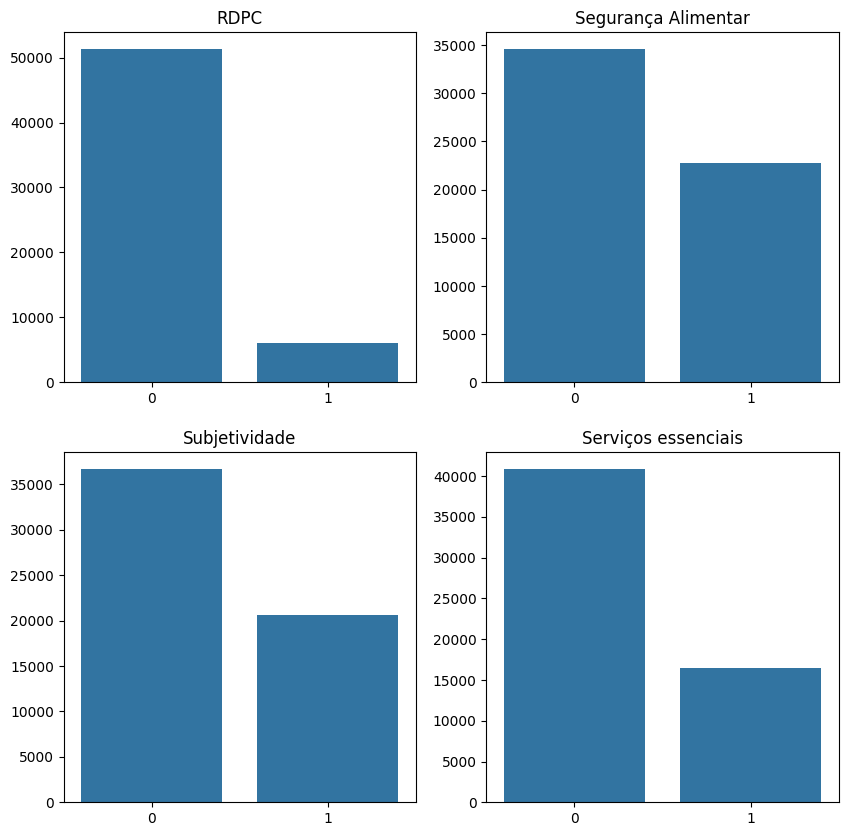

In [124]:
# plano
fig, eixos = mplt.subplots (2, 2, figsize=(10,10) )

# grafico1 = sn.countplot(MORADOR, x = 'var_depend1')
sn.countplot(base, x='rdpc', ax=eixos[0,0])
eixos[0,0].set_title('RDPC')
eixos[0,0].set_xlabel('')
eixos[0,0].set_ylabel('')

# grafico2 = sn.countplot(DOMICILIO, x = 'var_depend2')
sn.countplot(base, x = 'seg_alimentar', ax=eixos[0,1])
eixos[0,1].set_title('Segurança Alimentar')
eixos[0,1].set_xlabel('')
eixos[0,1].set_ylabel('')

# grafico3 = sn.countplot(CONDICOES_VIDA, x = 'var_depend3')
sn.countplot(base, x = 'subjetividade', ax= eixos[1,0])
eixos[1,0].set_title('Subjetividade')
eixos[1,0].set_xlabel('')
eixos[1,0].set_ylabel('')

# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
sn.countplot(base, x = 'serv_essenciais', ax= eixos[1,1])
eixos[1,1].set_title('Serviços essenciais')
eixos[1,1].set_xlabel('')
eixos[1,1].set_ylabel('')

mplt.show()

# Tabelas
Tabelas que mostram a frequência de ocorrência entre a variável 'V6199 - Segurança Alimentar' e outras variáveis

In [125]:
# distribuição dos domicílios conforme o grau de (in)segurança
# # Tabela cruzando a info de renda (usando os 2 extratos que criamos msm, <= ¼ de
# # Salário Mínimo e > de ¼ de Salário Mínimo ) com a variável de insegurança
# # alimentar
# outros cruzamentos

cruzamentos = ['TIPO_SITUACAO_REG','rdpc','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']

for i in cruzamentos:
    tabela = pd.crosstab(base[i], base['SEG_ALIMENTAR_V'])
    print('')
    print('')
    print('')
    print(f'Cruzamento Segurança Alimentar e {i}')
    print('')
    print(tabela)
    






Cruzamento Segurança Alimentar e TIPO_SITUACAO_REG

SEG_ALIMENTAR_V        1      2     3     4
TIPO_SITUACAO_REG                          
1                  27210  11213  3993  2334
2                   7394   3187  1253   781



Cruzamento Segurança Alimentar e rdpc

SEG_ALIMENTAR_V      1      2     3     4
rdpc                                     
0                32897  12366  3975  2093
1                 1707   2034  1271  1022



Cruzamento Segurança Alimentar e RENDIMENTO_TOTAL

SEG_ALIMENTAR_V       1     2     3     4
RENDIMENTO_TOTAL                         
1.0                1773  2588  1865  1621
2.0                5129  4493  1799   893
3.0               12993  5672  1377   511
4.0                7854  1007   138    52
5.0                6245   589    59    25
6.0                 610    51     8    13



Cruzamento Segurança Alimentar e PADRAO_FAMILIA

SEG_ALIMENTAR_V      1     2     3     4
PADRAO_FAMILIA                          
1.0              24652  6707  1640 

# V de Cramer
Média de associação entre vairáveis categóricas não binárias.
Tem valor entre 0 e 1 e quanto mais próximo de 1 maior é o grau de associação entre as variáveis em questão.

In [126]:
def v_cramer(coluna_2):
    matriz_confusao = pd.crosstab(base['SEG_ALIMENTAR_V'], base[coluna_2]).to_numpy()
    chi2 = ss.chi2_contingency(matriz_confusao)[0]
    n = matriz_confusao.sum()
    phi2 = chi2/n
    r,k = matriz_confusao.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

var = ['RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO','TIPO_SITUACAO_REG']

for i in var:
    v_cramer(i)
    print(f'V de Cramer utilizando a variável V6199 (Segurança Alimentar) e {i}: ',v_cramer(i))
    

V de Cramer utilizando a variável V6199 (Segurança Alimentar) e RENDIMENTO_TOTAL:  0.2970274439678655
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e PADRAO_FAMILIA:  0.30439726767285596
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e ESCOADOURO:  0.09869732599818477
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e DESTINO_LIXO:  0.04852567230398434
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e PAVIMENTACAO:  0.08925559275256097
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e IDADE:  0.06287185919588444
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e COR_RACA:  0.13631890669458416
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e SEXO:  0.09453680574205534
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e INSTRUCAO:  0.1173887502844249
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e GRANDE_REGIAO:  0.15084596658103347
V de Cramer utilizando a vari

#  Frequência Relativa
Gráficos mostrando as 5 maiores frequências relativas de cada variável.

C:\Users\JoãoPinheiro\AppData\Local\Temp\ipykernel_23784\2247796945.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sn.barplot(x=freq_relativa.index, y = freq_relativa.values, palette='dark', ax=z)
C:\Users\JoãoPinheiro\AppData\Local\Temp\ipykernel_23784\2247796945.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sn.barplot(x=freq_relativa.index, y = freq_relativa.values, palette='dark', ax=z)
C:\Users\JoãoPinheiro\AppData\Local\Temp\ipykernel_23784\2247796945.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sn.barplot(x=freq_relativa

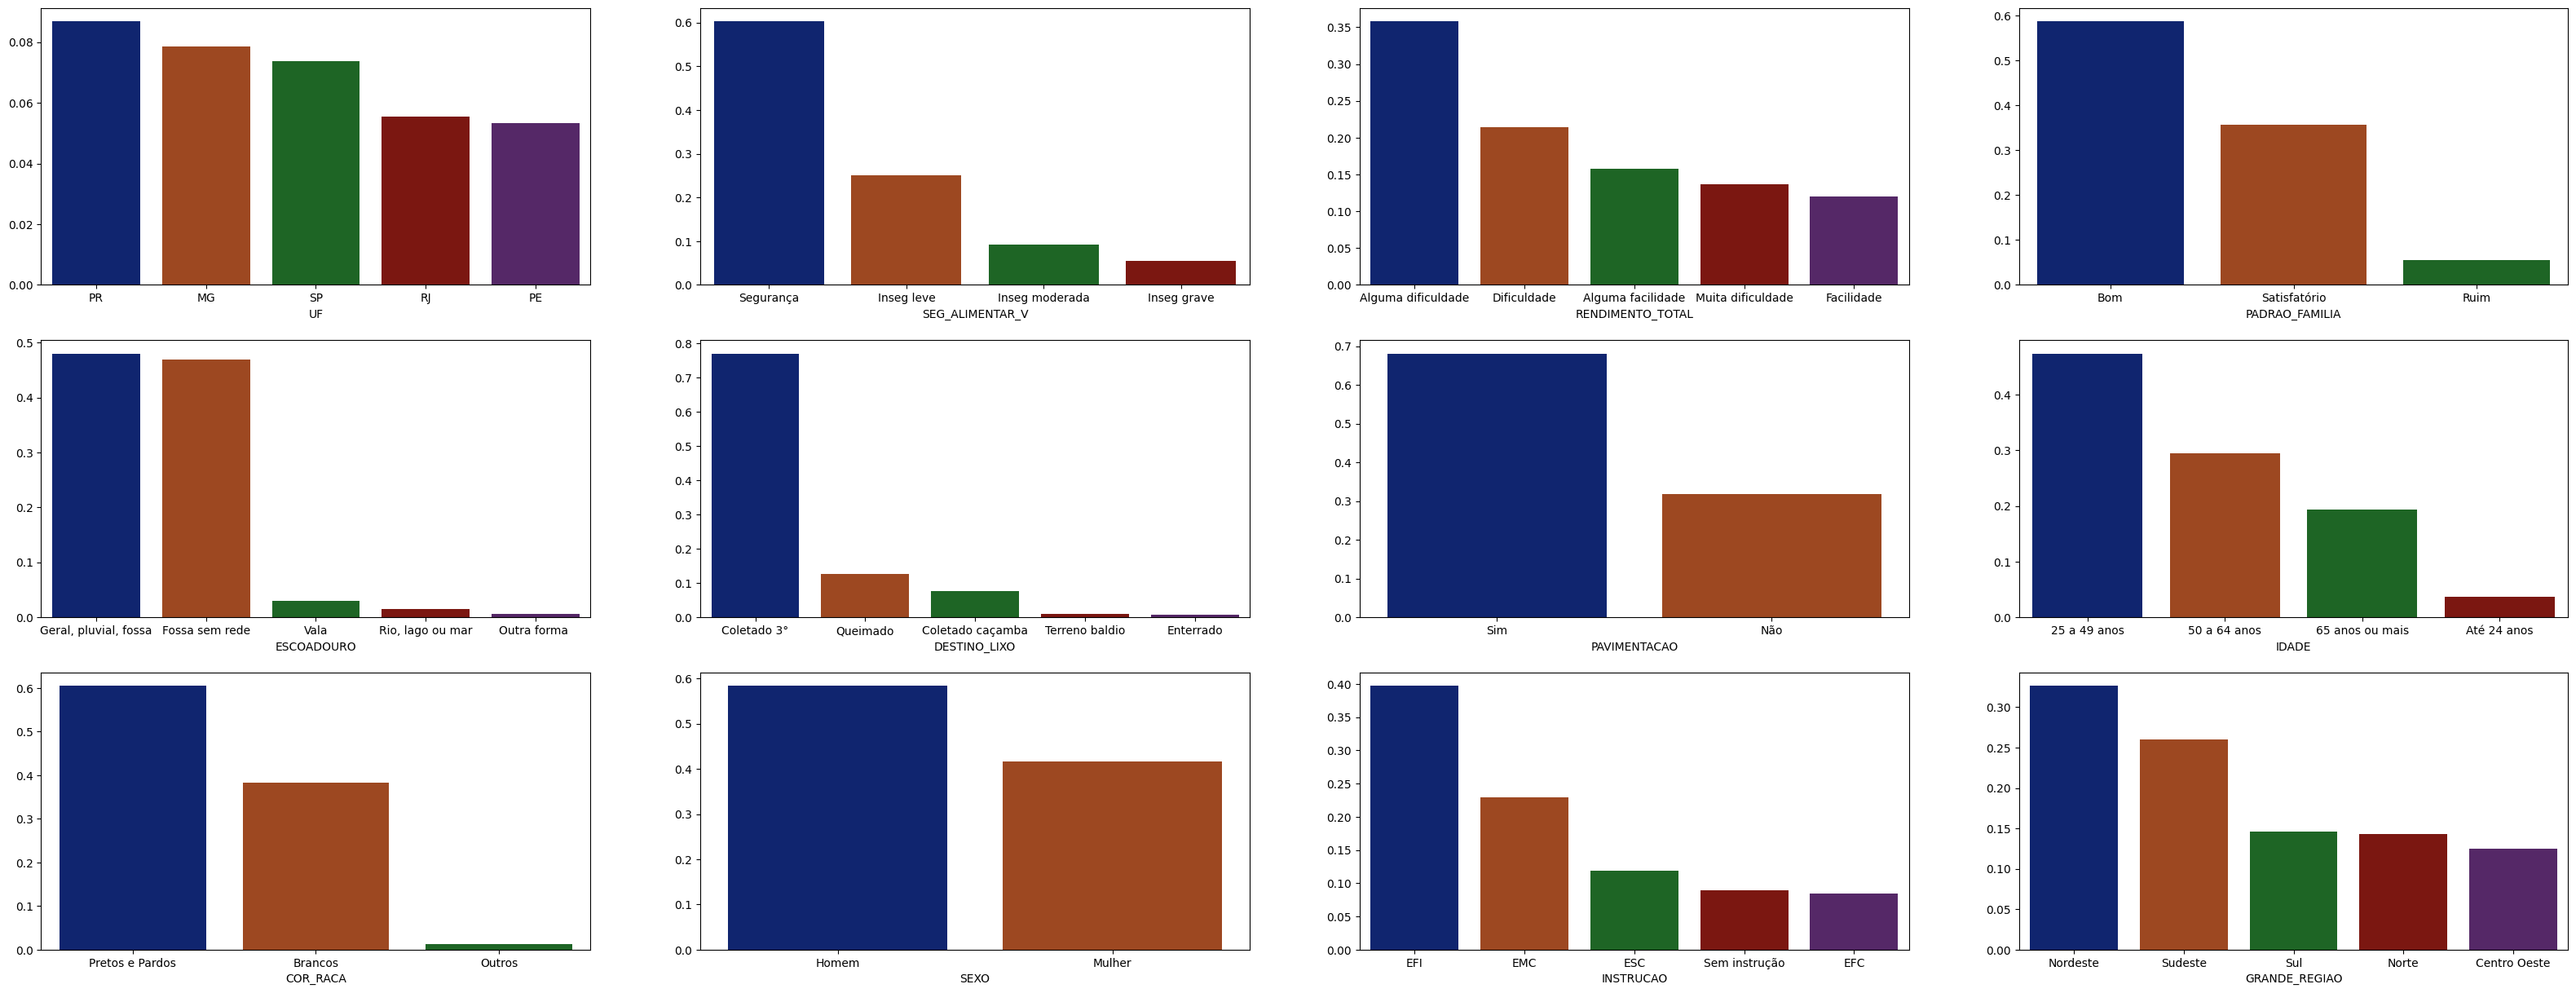

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [127]:
# variáveis numéricas
base['RENDA_MONET_PC'].describe()

# variáveis não numéricas
# graficos de frequencia relativa das 5 maiores frequencias relativas de cada variavel
base_auxiliar = base[['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC','SEG_ALIMENTAR_V','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']]
var = ['UF','SEG_ALIMENTAR_V','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']


#####################
# Mapeamento
# UF
base_auxiliar.loc[:, 'UF'] = base_auxiliar['UF'].map({11 : 'RO',12 : 'AC',13 : 'AM',14 : 'RR',15 : 'PR',16 : 'AM',17 : 'TO',21 : 'MA',22 : 'PI',23 : 'CE',
                                24 : 'RN',25 : 'PB',26 : 'PE',27 : 'AL',28 : 'SE',29 : 'BA',31 : 'MG',32 : 'ES',33 : 'RJ',35 : 'SP',
                                41 : 'PR',42 : 'SC',43 : 'RS',50 : 'MS',51 : 'MT',52 : 'GO',53 : 'DF'}).copy()

# V6199 - Segurança Alimentar
base_auxiliar.loc[:, 'SEG_ALIMENTAR_V'] = base_auxiliar['SEG_ALIMENTAR_V'].map({1 : 'Segurança',2 : 'Inseg leve', 3 : 'Inseg moderada',4 : 'Inseg grave'}).copy()

# V6101 - Rendimento total família
base_auxiliar.loc[:, 'RENDIMENTO_TOTAL'] = base_auxiliar['RENDIMENTO_TOTAL'].map({1 : 'Muita dificuldade',2 : 'Dificuldade', 3 : 'Alguma dificuldade',4 : 'Alguma facilidade', 5:'Facilidade', 6:'Muita facilidade'}).copy()

# V61041 - Padrão de vida família
base_auxiliar.loc[:, 'PADRAO_FAMILIA'] = base_auxiliar['PADRAO_FAMILIA'].map({1 : 'Bom',2 : 'Satisfatório', 3 : 'Ruim'}).copy()

# V0212 - Escoadouro
base_auxiliar.loc[:, 'ESCOADOURO'] = base_auxiliar['ESCOADOURO'].map({1 : 'Geral, pluvial, fossa',2 : 'Fossa sem rede', 3 : 'Vala',4 : 'Rio, lago ou mar', 5:'Outra forma '}).copy()

# V0213 - Destino lixo
base_auxiliar.loc[:, 'DESTINO_LIXO']  = base_auxiliar['DESTINO_LIXO'].map({1 : 'Coletado 3°',2 : 'Coletado caçamba', 3 : 'Queimado',4 : 'Enterrado', 5:'Terreno baldio', 6:'Outro'}).copy()

# V0220 - Pavimentação
base_auxiliar.loc[:, 'PAVIMENTACAO']  = base_auxiliar['PAVIMENTACAO'].map({1 : 'Sim',2 : 'Não'}).copy()

# C1 - Idade PR
base_auxiliar.loc[:, 'IDADE']  = base_auxiliar['IDADE'].map({1 : 'Até 24 anos',2 : '25 a 49 anos', 3 : '50 a 64 anos',4 : '65 anos ou mais'}).copy()

# C2 - Cor ou raça PR
base_auxiliar.loc[:, 'COR_RACA']  = base_auxiliar['COR_RACA'].map({1 : 'Brancos',2 : 'Pretos e Pardos', 3 : 'Outros'}).copy()

# C3 - Sexo PR
base_auxiliar.loc[:, 'SEXO'] = base_auxiliar['SEXO'].map({1 : 'Homem',2 : 'Mulher'}).copy()

# C4 - Instrução PR
base_auxiliar.loc[:, 'INSTRUCAO'] = base_auxiliar['INSTRUCAO'].map({1 : 'Sem instrução',2 : 'EFI', 3 : 'EFC',4 : 'EMI', 5:'EMC',6:'ESI', 7:'ESC'}).copy()

# GRANDE_REGIAO - Região Geográfica 
base_auxiliar.loc[:, 'GRANDE_REGIAO'] = base_auxiliar['GRANDE_REGIAO'].map({1 : 'Norte',2 : 'Nordeste', 3 : 'Sudeste',4 : 'Sul', 5:'Centro Oeste'}).copy()
#####################


fig, eixo = mplt.subplots (3, 4, figsize=(40,15))
for i, z in zip(var, eixo.flatten()):
        freq_relativa = base_auxiliar[i].value_counts(normalize = True).nlargest(5)
        mplt.figure()
        grafico = sn.barplot(x=freq_relativa.index, y = freq_relativa.values, palette='dark', ax=z)
        grafico.set(xlabel = i)
mplt.tight_layout()
mplt.show()



# Gráfico renda média por estado

    UF  RENDA_MONET_PC
0   PR      731.127218
1   MA      777.523295
2   AL      846.594375
3   CE     1023.396514
4   TO     1030.873175
5   AM     1063.782924
6   PB     1065.947863
7   PE     1109.563431
8   AM     1112.996629
9   RN     1158.225976
10  BA     1170.042298
11  RO     1182.667983
12  SE     1212.632753
13  PI     1226.530440
14  RR     1262.708276
15  AC     1308.102876
16  GO     1406.581719
17  MT     1455.869008
18  MG     1504.522206
19  ES     1545.568081
20  MS     1642.177882
21  PR     1654.595516
22  SC     1853.086595
23  RJ     1885.008742
24  RS     1984.657173
25  SP     2104.500868
26  DF     3215.430417


C:\Users\JoãoPinheiro\AppData\Local\Temp\ipykernel_23784\1182447856.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(y='RENDA_MONET_PC', x='UF', data = tabela, ax=ax, palette='dark')


<Axes: xlabel='UF', ylabel='RENDA_MONET_PC'>

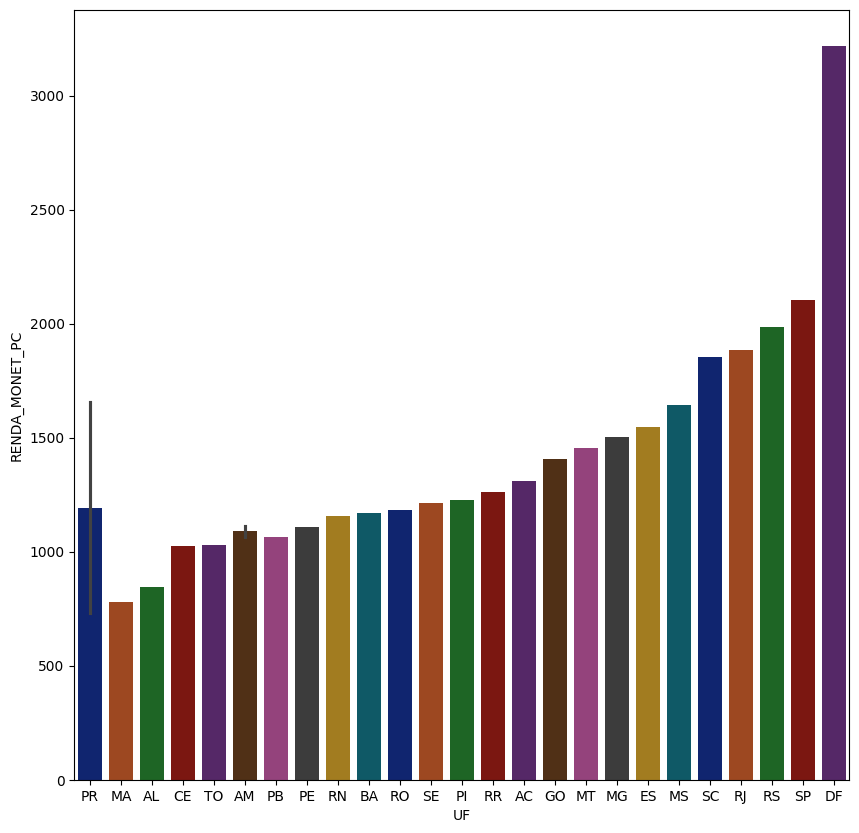

In [128]:
media_renda_uf = base.groupby('UF')['RENDA_MONET_PC'].mean().sort_values()
tabela = pd.DataFrame(media_renda_uf).reset_index()

tabela['UF'] = tabela['UF'].map({11 : 'RO',
                                12 : 'AC',
                                13 : 'AM',
                                14 : 'RR',
                                15 : 'PR',
                                16 : 'AM',
                                17 : 'TO',
                                21 : 'MA',
                                22 : 'PI',
                                23 : 'CE',
                                24 : 'RN',
                                25 : 'PB',
                                26 : 'PE',
                                27 : 'AL',
                                28 : 'SE',
                                29 : 'BA',
                                31 : 'MG',
                                32 : 'ES',
                                33 : 'RJ',
                                35 : 'SP',
                                41 : 'PR',
                                42 : 'SC',
                                43 : 'RS',
                                50 : 'MS',
                                51 : 'MT',
                                52 : 'GO',
                                53 : 'DF'}) 
print(tabela)

fig, ax = mplt.subplots(figsize = (10,10))
sn.barplot(y='RENDA_MONET_PC', x='UF', data = tabela, ax=ax, palette='dark')


# Criação de dummies

In [129]:
# C4 - Nível de Instrução da pessoa (perfil do chefe)
    # 1 – Sem instrução
    # 2 – Ensino Fundamental Incompleto
    # 3 – Ensino Fundamental Completo 
    # 4 – Ensino Médio Incompleto
    # 5 – Ensino Médio Completo 
    # 6 – Ensino Superior Incompleto
    # 7 – Ensino Superior Completo - dummy

# C3 - Sexo (PERFIL DO CHEFE)
    # 1- Masculino - dummy
    # 2- Feminino

# C2 - Cor ou raça (PERFI DO CHEFE)
    # 1 – Brancos - dummy
    # 2 – Pretos e Pardos
    # 3 – Outros

# C1 - IDADE - PERFIL DO CHEFE
    # 1 – Até 24 anos
    # 2 – 25 a 49 anos
    # 3 – 50 a 64 anos - dummy 
    # 4 – 65 anos ou mais - dummy

# GRANDE_REGIAO - REGIÃO (DUMY) - referência é o sudeste
    # 1- Norte
    # 2- Nordeste
    # 3- Sudeste - dummy
    # 4- Sul
    # 5- Centro-Oeste
    
# TIPO_SITUACAO_REG urbano (1) x rural (2)
    # 1 - Urbano - dummy
    # 2 - Rural


# VARIÁVEIS DEPENDENTES
# rdpc
# seg_alimentar
# subjetividade
# serv_essenciais

# base = base[['rdpc','seg_alimentar','subjetividade','serv_essenciais', 'TIPO_SITUACAO_REG','GRANDE_REGIAO', 'C1', 'C2', 'C3', 'C4']]

# # criacao de dummies
base = pd.get_dummies(base, columns=['TIPO_SITUACAO_REG', 'GRANDE_REGIAO','IDADE','COR_RACA','SEXO','INSTRUCAO'], dtype=int)
print(base.columns)


# # # considerando apenas as dummies de referencia

# base para rodar outras MQO no final do código
base2 = base[['rdpc','seg_alimentar','subjetividade','serv_essenciais',
                'INSTRUCAO_1.0',
                'INSTRUCAO_2.0',
                'INSTRUCAO_3.0',
                'INSTRUCAO_4.0',
                'INSTRUCAO_5.0',
                'INSTRUCAO_6.0',
                'SEXO_1.0',
                'COR_RACA_1.0',
                'IDADE_1.0',
                'IDADE_3.0',
                'IDADE_4.0',
                'GRANDE_REGIAO_1.0',
                'GRANDE_REGIAO_2.0',
                'GRANDE_REGIAO_4.0',
                'GRANDE_REGIAO_5.0',
                'TIPO_SITUACAO_REG_1',
                'RENDA_MONET_PC',
                'SEG_ALIMENTAR_V',
                'RENDIMENTO_TOTAL',
                'PADRAO_FAMILIA',
                'ESCOADOURO',
                'DESTINO_LIXO',
                'PAVIMENTACAO',
                'UF']]


base = base[['UF','rdpc','seg_alimentar','subjetividade','serv_essenciais', 'INSTRUCAO_7.0', 'SEXO_1.0','COR_RACA_1.0',
'IDADE_2.0','GRANDE_REGIAO_3.0', 'TIPO_SITUACAO_REG_1', 'RENDA_MONET_PC','SEG_ALIMENTAR_V','RENDIMENTO_TOTAL',
'PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO']]



Index(['UF', 'ESTRATO_POF', 'COD_UPA', 'NUM_DOM', 'RENDA_MONET_PC',
       'SEG_ALIMENTAR_V', 'RENDIMENTO_TOTAL', 'PADRAO_FAMILIA', 'ESCOADOURO',
       'DESTINO_LIXO', 'PAVIMENTACAO', 'rdpc', 'seg_alimentar',
       'var_depend3.1_inicial', 'var_depend3.2_inicial',
       'var_depend4.1_inicial', 'var_depend4.2_inicial',
       'var_depend4.3_inicial', 'subjetividade', 'serv_essenciais',
       'TIPO_SITUACAO_REG_1', 'TIPO_SITUACAO_REG_2', 'GRANDE_REGIAO_1.0',
       'GRANDE_REGIAO_2.0', 'GRANDE_REGIAO_3.0', 'GRANDE_REGIAO_4.0',
       'GRANDE_REGIAO_5.0', 'IDADE_1.0', 'IDADE_2.0', 'IDADE_3.0', 'IDADE_4.0',
       'COR_RACA_1.0', 'COR_RACA_2.0', 'COR_RACA_3.0', 'SEXO_1.0', 'SEXO_2.0',
       'INSTRUCAO_1.0', 'INSTRUCAO_2.0', 'INSTRUCAO_3.0', 'INSTRUCAO_4.0',
       'INSTRUCAO_5.0', 'INSTRUCAO_6.0', 'INSTRUCAO_7.0'],
      dtype='object')


# Correlação de Pearson entre variáveis dependentes e seg_alimentar

In [131]:
def get_corr_pearson (z):
    indices = np.isfinite(base[z]) & np.isfinite(base['seg_alimentar'])
    filtro_rdpc = base[z][indices]
    filtro_seg_alimentar = base['seg_alimentar'][indices]
    correlacao1, p_valor1 = stats.pearsonr(filtro_rdpc, filtro_seg_alimentar)
    return print(f'corr {z}: ',correlacao1, 'p-valor: ',p_valor1)
    

rdpc_corr = get_corr_pearson('rdpc')
subjetividade_corr = get_corr_pearson('subjetividade')
serv_essenciais_corr = get_corr_pearson('serv_essenciais')

# tabela de correlações
base_df_corr = base[['rdpc','subjetividade','serv_essenciais','seg_alimentar']]
base_df_corr.corr()



corr rdpc:  0.22448944751998579 p-valor:  0.0
corr subjetividade:  0.39944765239655755 p-valor:  0.0
corr serv_essenciais:  0.08764239164640558 p-valor:  3.3964419955077785e-98


,rdpc,subjetividade,serv_essenciais,seg_alimentar
rdpc,1.000000,0.181219,0.134901,0.224489
subjetividade,0.181219,1.000000,0.031460,0.399448
serv_essenciais,0.134901,0.031460,1.000000,0.087642
seg_alimentar,0.224489,0.399448,0.087642,1.000000


# Variáveis independentes

In [132]:
var_x = base[['INSTRUCAO_7.0', 'SEXO_1.0','COR_RACA_1.0', 'IDADE_2.0', 'GRANDE_REGIAO_3.0', 'TIPO_SITUACAO_REG_1']]

var_x_base2 = base2[['INSTRUCAO_1.0', 'INSTRUCAO_2.0', 'INSTRUCAO_3.0', 'INSTRUCAO_4.0',
'INSTRUCAO_5.0', 'INSTRUCAO_6.0', 'SEXO_1.0', 'COR_RACA_1.0',
'IDADE_1.0', 'IDADE_3.0', 'IDADE_4.0', 'GRANDE_REGIAO_1.0',
'GRANDE_REGIAO_2.0', 'GRANDE_REGIAO_4.0', 'GRANDE_REGIAO_5.0',
'TIPO_SITUACAO_REG_1']]



In [133]:
base.head()

,UF,rdpc,seg_alimentar,subjetividade,serv_essenciais,INSTRUCAO_7.0,SEXO_1.0,COR_RACA_1.0,IDADE_2.0,GRANDE_REGIAO_3.0,TIPO_SITUACAO_REG_1,RENDA_MONET_PC,SEG_ALIMENTAR_V,RENDIMENTO_TOTAL,PADRAO_FAMILIA,ESCOADOURO,DESTINO_LIXO,PAVIMENTACAO
0,11,0,0,0,0,1,0,1,1,0,1,2506.497500,1,5.0,1.0,2.0,1,1
4,11,0,0,0,0,0,0,1,1,0,1,3609.356667,1,3.0,2.0,2.0,1,1
7,11,0,0,0,0,0,1,1,1,0,1,1443.868796,1,5.0,1.0,2.0,1,1
10,11,0,0,0,1,0,1,1,0,0,1,2280.899167,1,3.0,1.0,2.0,1,2
11,11,0,0,0,0,1,1,0,1,0,1,2065.710000,1,5.0,1.0,2.0,1,1


# MQO - Mínimos Quadrados Ordinários
Há o teste de homocedasticidade e verificação de multicolinearidade.


O aviso FutureWarning está indicando a utilização da função, 'save()'', que não faz parte da API pública do pacote ou biblioteca. Isso significa que essa função pode não estar garantida para funcionar corretamente ou pode ser removida em futuras versões do pacote.

Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel.

## Teste de homocedasticidade
'exog' indica variaveis exógenas, ou seja, faz uma matriz das variáveis independentes do modelo.
Precisa ser próximo de 1 para os dados serem homocedásticos.

## Teste de multicolinearidade
Caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis.


In [134]:
# MQO - rdpc
# rdpc
var_y = base[['rdpc']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary())# 
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_rdpc = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  
print(teste_homo_rdpc)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:                   rdpc   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     535.3
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:04   Log-Likelihood:                -12053.
No. Observations:               57365   AIC:                         2.412e+04
Df Residuals:                   57358   BIC:                         2.418e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1854    

In [135]:
# MQO - seg_alimentar
var_y = base[['seg_alimentar']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary())
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_seg_alimentar = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(teste_homo_seg_alimentar) 

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:          seg_alimentar   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     750.5
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:05   Log-Likelihood:                -38218.
No. Observations:               57365   AIC:                         7.645e+04
Df Residuals:                   57358   BIC:                         7.651e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5282    

(0.8262510140611452, 0.9999999999999999, 'increasing')
                          vif
INSTRUCAO_7.0        1.048445
SEXO_1.0             1.034550
COR_RACA_1.0         1.033209
IDADE_2.0            1.017184
GRANDE_REGIAO_3.0    1.017862
TIPO_SITUACAO_REG_1  1.051994


In [136]:
# MQO - subjetividade
var_y = base[['subjetividade']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary())
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_subjetividade = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(teste_homo_subjetividade)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:          subjetividade   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     369.2
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:05   Log-Likelihood:                -38216.
No. Observations:               57365   AIC:                         7.645e+04
Df Residuals:                   57358   BIC:                         7.651e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4614    

In [137]:
# MQO - serv_essenciais
var_y = base[['serv_essenciais']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary())
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_serv_essenciais = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(teste_homo_serv_essenciais)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:        serv_essenciais   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     8977.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:06   Log-Likelihood:                -16925.
No. Observations:               57365   AIC:                         3.386e+04
Df Residuals:                   57358   BIC:                         3.393e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8819    

In [138]:
# MQO - rdpc - 2
# todas as variáveis menos a dummy


# rdpc
var_y = base2['rdpc']
var_x_base2 = sm.add_constant(var_x_base2)
modelo = sm.OLS(var_y, var_x_base2 ).fit()
print(modelo.summary())
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_rdpc = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(teste_homo_rdpc)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x_base2.values, i ) for i in range(var_x_base2.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x_base2.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:                   rdpc   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     407.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:06   Log-Likelihood:                -10526.
No. Observations:               57365   AIC:                         2.109e+04
Df Residuals:                   57348   BIC:                         2.124e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1079    

In [139]:
# MQO - seg_alimentar - 2
var_y = base2[['seg_alimentar']]
var_x_base2 = sm.add_constant(var_x_base2)
modelo = sm.OLS(var_y, var_x_base2 ).fit()
print(modelo.summary())
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_seg_alimentar = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(teste_homo_seg_alimentar) 

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x_base2.values, i ) for i in range(var_x_base2.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x_base2.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:          seg_alimentar   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     499.1
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:08   Log-Likelihood:                -36646.
No. Observations:               57365   AIC:                         7.333e+04
Df Residuals:                   57348   BIC:                         7.348e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2626    

In [140]:
# MQO - subjetividade - 2
var_y = base2[['subjetividade']]
var_x_base2 = sm.add_constant(var_x_base2)
modelo = sm.OLS(var_y, var_x_base2 ).fit()
print(modelo.summary())
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_subjetividade = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(teste_homo_subjetividade)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x_base2.values, i ) for i in range(var_x_base2.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x_base2.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:          subjetividade   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:10   Log-Likelihood:                -37387.
No. Observations:               57365   AIC:                         7.481e+04
Df Residuals:                   57348   BIC:                         7.496e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2122    

In [141]:
# MQO - serv_essenciais - 2
var_y = base2[['serv_essenciais']]
var_x_base2 = sm.add_constant(var_x_base2)
modelo = sm.OLS(var_y, var_x_base2 ).fit()
print(modelo.summary())
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_serv_essenciais = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)
print(teste_homo_serv_essenciais)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
vif= [ variance_inflation_factor(var_x_base2.values, i ) for i in range(var_x_base2.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x_base2.columns.drop('const'))
print(tabela_vif)


                            OLS Regression Results                            
Dep. Variable:        serv_essenciais   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3507.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:19:12   Log-Likelihood:                -16348.
No. Observations:               57365   AIC:                         3.273e+04
Df Residuals:                   57348   BIC:                         3.288e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6860    